In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from pathlib import Path
import os
import tensorflow as tf

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikthour","key":"854772165a20adf6b63b62f944d1936f"}'}

In [3]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# Copy the kaggle.json file into the /.kaggle folder
! cp kaggle.json ~/.kaggle/

In [5]:
# Permission for the json to be executed.

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d andyczhao/covidx-cxr2 -p Dataset

100% 12.9G/12.9G [04:58<00:00, 61.6MB/s]
100% 12.9G/12.9G [04:58<00:00, 46.5MB/s]


In [ ]:
!unzip Dataset/covidx-cxr2.zip

In [8]:
# Select the directory
covid_detector_train = Path('/content/train')
covid_detector_test = Path('/content/test')

# Create the filepath using the directory
train_filepaths = list(covid_detector_train.glob(r'**/*.png')) + list(covid_detector_train.glob(r'**/*.jpg')) + list(covid_detector_train.glob(r'**/*.jpeg'))
test_filepaths  = list(covid_detector_test.glob(r'**/*.png')) + list(covid_detector_test.glob(r'**/*.jpg')) + list(covid_detector_test.glob(r'**/*.jpeg'))

In [34]:
# Select the directory
covid_detector_train = Path('/content/train')
covid_detector_test = Path('/content/test')

train_text = pd.read_csv('/content/train.txt', header=None, delimiter= " ")
train_text.columns = ['id', 'filename', 'class', 'datasource']
test_text = pd.read_csv('/content/test.txt', header = None, delimiter = " ")
test_text.columns = ['id', 'filename', 'class', 'datasource']

train_text.head(5)

,id,filename,class,datasource
0,5,ARDSSevere.png,negative,cohen
1,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen
2,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen
3,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen
4,28,pneumocystis-pneumonia-2-PA.png,negative,cohen


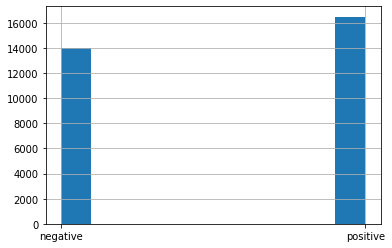

In [35]:
train_text['class'].hist()

In [10]:
train_labels = []

with open('train.txt') as f:
  lines = f.readlines()
#  for i in lines:
#    filename = lines.split(' ')[1]
#    label = lines.split(' ')[2]

#file_label = pd.DataFrame([label], [filename])
#file_label.head()

lines

['5 ARDSSevere.png negative cohen\n',
 '25 acute-respiratory-distress-syndrome-ards-1.jpg negative cohen\n',
 '26 acute-respiratory-distress-syndrome-ards.jpg negative cohen\n',
 '27 ards-secondary-to-tiger-snake-bite.png negative cohen\n',
 '28 pneumocystis-pneumonia-2-PA.png negative cohen\n',
 '38 F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg negative cohen\n',
 '101 pneumocystis-jirovecii-pneumonia-3-1.jpg negative cohen\n',
 '101 pneumocystis-jirovecii-pneumonia-3-2.jpg negative cohen\n',
 '101 pneumocystis-jirovecii-pneumonia-3-3.jpg negative cohen\n',
 '102 pneumocystis-pneumonia-1.jpg negative cohen\n',
 '103 X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg negative cohen\n',
 '104 pneumocystis-pneumonia-8.jpg negative cohen\n',
 '105 pneumocystis-carinii-pneumonia-1-PA.jpg negative cohen\n',
 '106 pneumocystis-pneumonia-12.png negative cohen\n',
 '107 pneumocystis-jiroveci-pneumonia-2.png negative cohen\n',
 '108 pneumocystis-jirovecii-pneumonia-2.jpg negative cohen\n',
 '109 pneumoc

In [11]:
lines

['5 ARDSSevere.png negative cohen\n',
 '25 acute-respiratory-distress-syndrome-ards-1.jpg negative cohen\n',
 '26 acute-respiratory-distress-syndrome-ards.jpg negative cohen\n',
 '27 ards-secondary-to-tiger-snake-bite.png negative cohen\n',
 '28 pneumocystis-pneumonia-2-PA.png negative cohen\n',
 '38 F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg negative cohen\n',
 '101 pneumocystis-jirovecii-pneumonia-3-1.jpg negative cohen\n',
 '101 pneumocystis-jirovecii-pneumonia-3-2.jpg negative cohen\n',
 '101 pneumocystis-jirovecii-pneumonia-3-3.jpg negative cohen\n',
 '102 pneumocystis-pneumonia-1.jpg negative cohen\n',
 '103 X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg negative cohen\n',
 '104 pneumocystis-pneumonia-8.jpg negative cohen\n',
 '105 pneumocystis-carinii-pneumonia-1-PA.jpg negative cohen\n',
 '106 pneumocystis-pneumonia-12.png negative cohen\n',
 '107 pneumocystis-jiroveci-pneumonia-2.png negative cohen\n',
 '108 pneumocystis-jirovecii-pneumonia-2.jpg negative cohen\n',
 '109 pneumoc

In [12]:
train_labels = []

with open('train.txt') as f:
  lines = f.readlines()
  for i in lines:
    filename = lines[i].split(' ')[1]
    label = lines[i].split(' ')[2]

file_label = pd.DataFrame([label], [filename])
file_label.head()

TypeError: ignored

In [ ]:
train_filepaths[1].split('/')[-1]

In [ ]:
file_label.head(4)

In [ ]:
train_labels = []

for i in range(len(train_filepaths)):
    if train_filepaths[1].split('/')[-1] == file_label[0].split(' ')[1]:
      train_labels = lines.split(' ')[2]

In [ ]:
train_filepaths.split("/")[3]

In [43]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
training_set = train_data.flow_from_dataframe(dataframe=train_text, directory='/content/train', x_col = 'filename', y_col='class',
                                              target_size=(128, 128), batch_size = 32, class_mode= 'binary', validation_split=0.15,
                                              subset = 'training', color_mode='grayscale')

#validation_set = train_data.flow_from_dataframe(dataframe=train_text, directory='/content/train', x_col = 'filename', y_col='class',
#                                              target_size=(128, 128), batch_size = 32, class_mode= 'binary', validation_split=0.15,
#                                              subset = 'validation', color_mode='grayscale')

Found 30482 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 2 classes.


In [44]:
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
testing_set = train_data.flow_from_dataframe(dataframe=test_text, directory='/content/test', x_col = 'filename', y_col='class',
                                             target_size=(128, 128), batch_size = 32, class_mode= 'binary', color_mode='grayscale')

Found 400 validated image filenames belonging to 2 classes.


In [47]:
#Build a model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, 3, activation= 'relu'),
                                    tf.keras.layers.MaxPool2D((2, 2)),
                                    tf.keras.layers.Conv2D(32, 3, activation= 'relu'),
                                    tf.keras.layers.MaxPool2D((2, 2)),
                                    tf.keras.layers.Conv2D(32, 3, activation= 'relu'),
                                    tf.keras.layers.MaxPool2D((2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation= 'relu'),
                                    tf.keras.layers.Dense(128, activation= 'relu'),
                                    tf.keras.layers.Dense(32, activation= 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

model.fit(training_set, validation_data = testing_set, epochs=5)

Epoch 1/5
953/953 [==============================] - 742s 778ms/step - loss: 0.3312 - accuracy: 0.8488 - val_loss: 0.4166 - val_accuracy: 0.8375
Epoch 2/5
953/953 [==============================] - 733s 769ms/step - loss: 0.2425 - accuracy: 0.8979 - val_loss: 0.5765 - val_accuracy: 0.7675
Epoch 3/5
953/953 [==============================] - 731s 767ms/step - loss: 0.2033 - accuracy: 0.9167 - val_loss: 0.3897 - val_accuracy: 0.8425
Epoch 4/5
953/953 [==============================] - 731s 767ms/step - loss: 0.1723 - accuracy: 0.9310 - val_loss: 0.6658 - val_accuracy: 0.7975
Epoch 5/5
953/953 [==============================] - 755s 792ms/step - loss: 0.1620 - accuracy: 0.9359 - val_loss: 0.4592 - val_accuracy: 0.8200


In [48]:
model.save('Bird_or_Drone_model')

INFO:tensorflow:Assets written to: Bird_or_Drone_model/assets


In [49]:
model.save('Bird_or_Drone_model.hdf5')